# Stepik ML contest

#### Практическим проектом нашего курса будет анализ активности студентов онлайн курса Введение в анализ данных в R, спасибо команде stepik, что предоставили анонимизированные данные.

В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах раскажу во втором модуле!

Описание данных:

**events_train.csv** - данные о действиях, которые совершают студенты со стэпами

- step_id - id стэпа
- user_id - анонимизированный id юзера
- timestamp - время наступления события в формате unix date
- action - событие, возможные значения: 
    - discovered - пользователь перешел на стэп
    - viewed - просмотр шага,
    - started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
    - passed - удачное решение практического шага

**submissions_train.csv** - данные о времени и статусах сабмитов к практическим заданиям

- step_id - id стэпа
- timestamp - время отправки решения в формате unix date
- submission_status - статус решения
- ser_id - анонимизированный id юзера

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
submissions_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/Введение_в_Data_Science_и_машинное_обучение/Введение/submissions_data_train.zip')
events_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-kamsarin/Введение_в_Data_Science_и_машинное_обучение/Введение/event_data_train.zip')

In [6]:
submissions_train.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


##### "сырые" данные

In [10]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


##### проверяем на правильность

In [11]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [3]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [13]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [14]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [15]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [16]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

###### Работа с временем и датой - очень важный аспект в мире Data Science. Практически все базы данных используют timestamp для определения времени события, в машинном обучении есть целое направление - анализ временных рядов, для аналитики продукта очень важно понимать, как располагаются события во времени. 

Подготовил для вас несколько полезных статей:

Работы с датой в Pandas https://medium.com/datadriveninvestor/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d

и еще один вариантhttps://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

Работа с датой в Python при помощи модуля datetime https://python-scripts.com/datetime-time-python

- +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
справка

In [ ]:
import pandas as pd 

df = pd.DataFrame({'time': ['11-03-01 17:34']})
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M')
df['time_rounded'] = df['time'].dt.round('1H') # округляем до ближайшего значения с шагом в один час 
print(df['time_rounded']) 

    %d — день месяца (от 01 до 31)

    %m — номер месяца (от 01 до 12)

    %Y — четырёхзначный номер года (например, 2019)

    Z или T — стандартный разделитель даты и времени

    %H — номер часа в 24-часовом формате

    %I — номер часа в 12-часовом формате

    %M — минуты (от 00 до 59)

    %S — секунды (от 00 до 59)

    'D' — *day (*от англ. «день»)

    'H' — hour (от англ. «час»)

    'min' или 'T' — minute (от англ. «минута»)

    'S' — second (от англ. «секунда»)

Чтобы быть уверенными в том, что время будет округлено к бóльшему значению, обращаются к методу **dt.ceil()** (от англ. ceiling — «потолок»). К меньшему значению, «вниз», округляют методом **dt.floor()** (англ. floor, «пол»).

In [ ]:
import pandas as pd

df = pd.DataFrame({'time': ['11-03-01 17:15']})
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M')
df['ceil'] = df['time'].dt.ceil('1H') # округляем к потолку
df['floor'] = df['time'].dt.floor('1H') # округляем к полу 
print('Время, округлённое вверх', df['ceil'])
print('Время, округлённое вниз', df['floor']) 

Номер дня в неделе находят методом dt.weekday (англ. weekday, «будний день»). Понедельник — день под номером 0, а воскресенье — шестой день.

In [ ]:
import pandas as pd 

df = pd.DataFrame({'time': ['11-03-07 17:15', '11-04-02 17:15']}) # пн и сб
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M')
df['weekday'] = df['time'].dt.weekday
print(df['weekday']) 

In [ ]:
Скопировать код
0    0
1    5
Name: time, dtype: int64 

Иногда нужно переводить время в другой часовой пояс. За временные сдвиги отвечает pd.Timedelta() (от англ. time delta — «дельта времени, перепад во времени»). Количество часов передают в параметре: (hours=10).

Прибавим 9 часов к московскому времени и узнаем, который час был в Петропавловске-Камчатском, когда в Москве происходили события датафрейма:

In [ ]:
import pandas as pd

df = pd.DataFrame({'time': ['11-03-07 17:15', '11-05-02 10:20']})
df['moscow_time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M')
df['petropavlovsk-kamchatsky_time'] = df['moscow_time'] + pd.Timedelta(hours=9)
print(df['petropavlovsk-kamchatsky_time']) 

Можно и наоборот: отнимать время, указав в параметре отрицательное количество часов.

Из секунд от 1970 переводит в дни месяцы и годы.

In [23]:
df['data'] = pd.to_datetime(df['timestamp'], unit='s').dt\\
                                        .strftime('%d-%m-%Y')

SyntaxError: unexpected character after line continuation character (<ipython-input-23-c5a0029c2552>, line 1)

завершение справки
- +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [4]:
events_data['day'] = events_data.date.dt.date

In [18]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


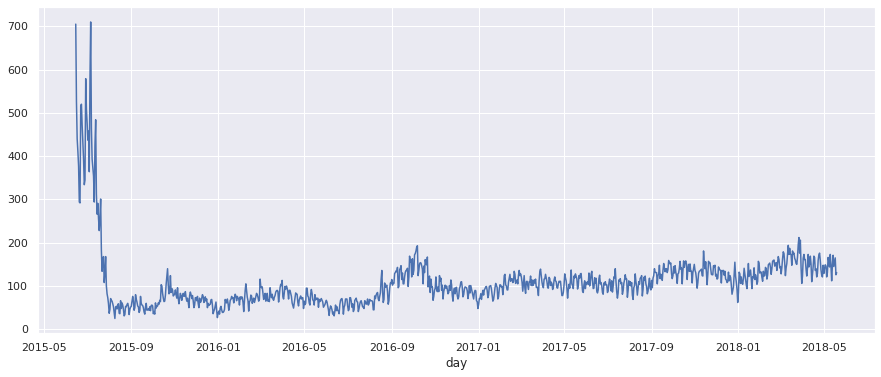

In [25]:
events_data.groupby('day')\
        .user_id.nunique().plot()

In [5]:
# настройка размера графика
sns.set(rc={'figure.figsize':(15, 6)})

In [26]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


# здесь(ниже) не совсем корректно посчитано

In [29]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False)\
            .agg({'step_id':'count'})\
            .rename(columns={'step_id':'passed_steps'})\
            .head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


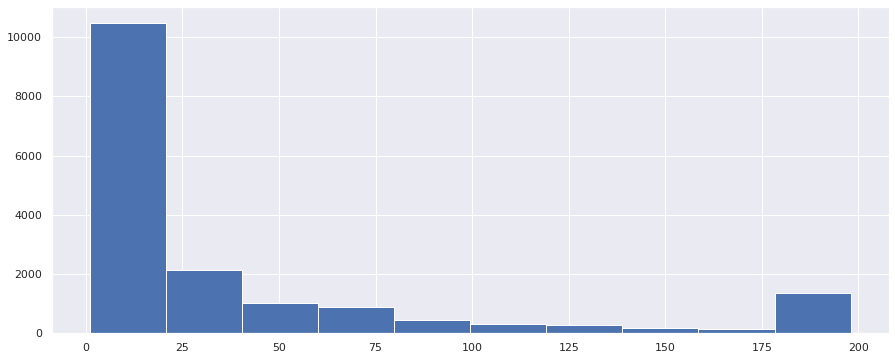

In [31]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False)\
            .agg({'step_id':'count'})\
            .rename(columns={'step_id':'passed_steps'})\
            .passed_steps.hist();

# вопрос

##### Что не так с нашими расчетами сумарного количества пройденных стэпов?

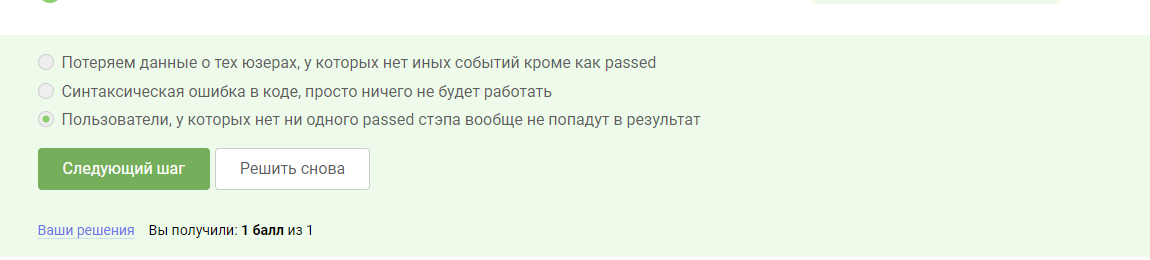

## Другое решение "правильное"

In [33]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [34]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


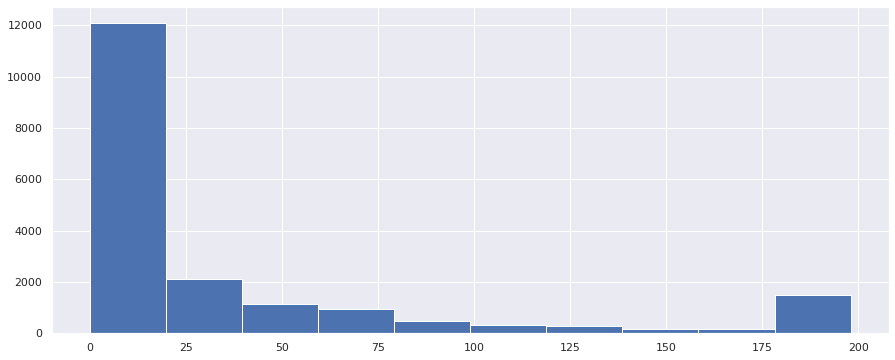

In [11]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).reset_index().discovered.hist();

##### Продолжаем предобрабатывать данные

В этом уроке познакомимся с merge и http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

join в Pandas http://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

А также рассмотрим продвинутый прием по работе с данными при помощи метода apply https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [15]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [6]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [7]:
submissions_data['day'] = submissions_data.date.dt.date

In [8]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [46]:
user_scores = submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count',
                       fill_value=0).reset_index()

In [47]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [ ]:
ишем порог для отсеивания

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [12]:
# это для примера
events_data[['step_id','user_id']].head()

,step_id,user_id
0,32815,17632
1,32815,17632
2,32815,17632
3,32811,17632
4,32811,17632


In [13]:
# принцип работы drop_duplicates
events_data[['step_id','user_id']].head().drop_duplicates()

,step_id,user_id
0,32815,17632
3,32811,17632


In [14]:
events_data[['user_id','day','timestamp']].drop_duplicates().head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895
6,17632,2015-06-15,1434340921
8,17632,2015-06-15,1434340939
9,17632,2015-06-15,1434340944


In [15]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [16]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [17]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [18]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [19]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [20]:
np.concatenate(gap_data, axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [21]:
pd.Series(np.concatenate(gap_data, axis=0))

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [22]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
# переведем в дни
gap_data=gap_data/(24*60*60)

In [24]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

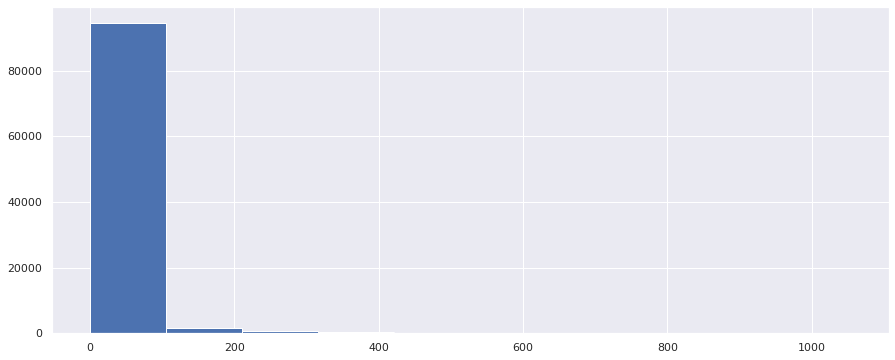

In [25]:
gap_data.hist()

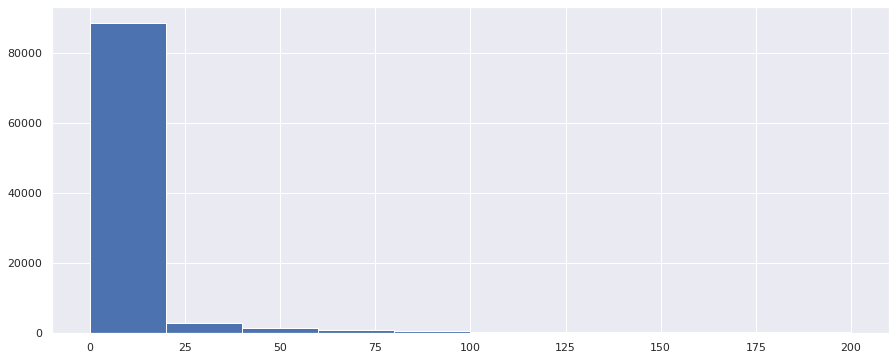

In [26]:
# похоже есть выбросы / отфильтруем
gap_data[gap_data<200].hist()

In [27]:
gap_data.quantile(0.95)

59.760440972222156

In [28]:
gap_data.quantile(0.9)

18.325995370370403

In [ ]:
время отстутсвия  после которого считаеим что пользователь ушел будем считать

# вопрос

###### Как я уже писал ранее, данные, с которыми мы работаем, обезличены, тоесть реальные id пользователей заменены случайным числом. Анонимизация пользовательских данных - очень важная тема для Data Science. С одной стороны мы хотим знать о поведении наших пользователей как можно больше, с другой стороны нам важно соблюдать приватность наших пользователей.

Поэтому данные о поведении пользователей анонимизируют не только когда речь идет об открытых данных, но и при работе с данными внутри компании. Не заметили сколько писем вам недавно пришло об изменении политики конфеденциальности, хотите узнать почему? В комментарии приложена ссылка на очень интересный доклад об этой проблеме.

А пока что вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого мы анализируем?

Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [7]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [8]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [31]:
events_data[['user_id','day']].drop_duplicates().groupby('user_id',as_index=False).agg({'day':'count'}).sort_values('day')

,user_id,day
0,1,1
10714,14873,1
10715,14875,1
10717,14878,1
10719,14880,1
...,...,...
2611,3572,236
7780,10794,281
3182,4374,327
9547,13268,385


In [32]:
submissions_data[['user_id','day']].drop_duplicates().groupby('user_id',as_index=False).agg({'day':'count'}).sort_values('day')

,user_id,day
0,2,1
5215,13917,1
5212,13913,1
5206,13906,1
5205,13905,1
...,...,...
6664,17825,50
1381,3572,51
2536,6662,51
4353,11651,51


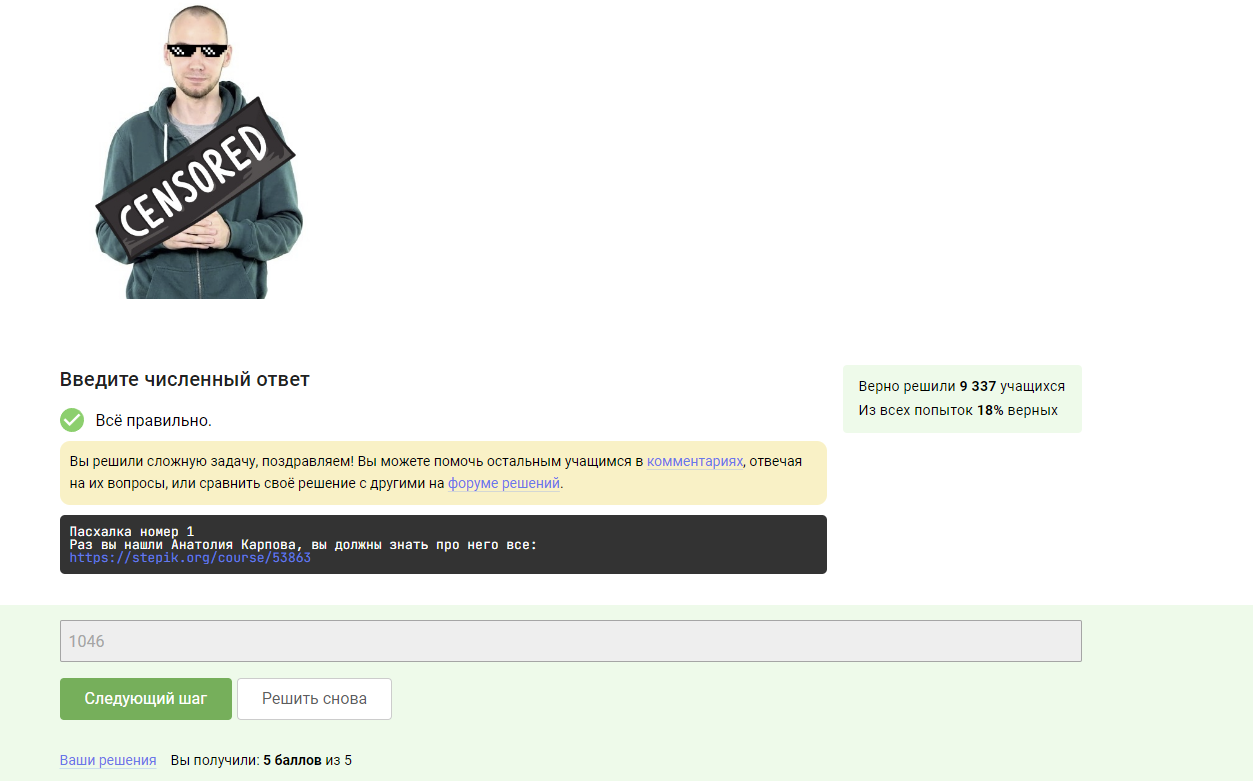

In [35]:
events_data.groupby('user_id')['day'].nunique().idxmax()

1046

In [36]:
# Первый прошедший последний стэп:

events_data[(events_data.action == 'passed') & (events_data.step_id == events_data.step_id.max())]



,step_id,timestamp,action,user_id,date,day
1780990,158433,1485263664,passed,1046,2017-01-24 13:14:24,2017-01-24
1781275,158433,1485271669,passed,3931,2017-01-24 15:27:49,2017-01-24
1781402,158433,1485276014,passed,14985,2017-01-24 16:40:14,2017-01-24
1782093,158433,1485288441,passed,10626,2017-01-24 20:07:21,2017-01-24
1782261,158433,1485292242,passed,3876,2017-01-24 21:10:42,2017-01-24
...,...,...,...,...,...,...
3478762,158433,1526744472,passed,19147,2018-05-19 15:41:12,2018-05-19
3479191,158433,1526750524,passed,13751,2018-05-19 17:22:04,2018-05-19
3479506,158433,1526754540,passed,19491,2018-05-19 18:29:00,2018-05-19
3479620,158433,1526755659,passed,2058,2018-05-19 18:47:39,2018-05-19


In [37]:
# Получаеи список из юзер с наибольшим количеством верно решенных степов.

submissions_data[["user_id","submission_status"]].query("submission_status == 'correct' ")["user_id"].value_counts()

1046     421
5552     186
17135    168
6183     142
8461     135
        ... 
16038      1
20705      1
22912      1
25319      1
15724      1
Name: user_id, Length: 9794, dtype: int64

In [38]:
submissions_data[submissions_data.submission_status == 'correct'].groupby('user_id') \
    .agg({'submission_status':'count'})\
.sort_values(by=['submission_status'], ascending=False).head()

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135


## +++++++++++++++++++++++++++++ продолжаем лекцию ++++++++++++++++++++++++

In [29]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


##### разметим дропнувших учеников

###### найдем максимальное время для каждого пользователя

In [30]:
events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp':'max'}).head()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [31]:
# пороговое значение 30 дней
30*24*60*60

2592000

In [74]:
user_data= events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

1526772811 последнее посещени в наших данных

In [75]:
now = 1526772811
drop_out_threshold = 2592000

In [76]:
user_data['is_done_user'] = (now - user_data.last_timestamp)>drop_out_threshold

In [45]:
user_data.head()

,user_id,last_timestamp,is_done_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


###### скорее всего они уже не вернутся

In [48]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [77]:
user_data.merge(user_scores).head()

,user_id,last_timestamp,is_done_user,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


In [78]:
users_data = user_data.merge(user_scores, how='outer')

In [53]:
users_data.head()

,user_id,last_timestamp,is_done_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [79]:
users_data= users_data.fillna(0)

In [57]:
users_data.head(20)

,user_id,last_timestamp,is_done_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [80]:
user_events_data = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count',
                       fill_value=0).reset_index()

In [81]:
user_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [82]:
users_data = users_data.merge(user_events_data, how='outer')


In [61]:
users_data.head()

,user_id,last_timestamp,is_done_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


###### еще добавим сколько уникальных дней был на курсе

In [83]:
users_days = events_data.groupby('user_id').day.nunique()

In [63]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [64]:
users_days.to_frame()

,day
user_id,
1,1
2,2
3,7
5,2
7,1
...,...
26790,4
26793,1
26794,9


In [84]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [66]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [85]:
users_data = users_data.merge(users_days, how='outer')

In [86]:
users_data.head()

,user_id,last_timestamp,is_done_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


###### проверяем что никого не потеряли( считаем сколько юзеров получилось)

In [87]:
users_data.user_id.nunique()

19234

In [88]:
events_data.user_id.nunique()

19234

##### добавим колонку что курс закончен

In [89]:
users_data['passed_corse'] = users_data.passed > 170

In [90]:
users_data.head()

,user_id,last_timestamp,is_done_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [91]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_done_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [92]:
100 * 1425 / 17809

8.001572238755685

###### Обязательно запомните типы merge и join, это справделиво не только для Pandas, но и для работы с базами данных.

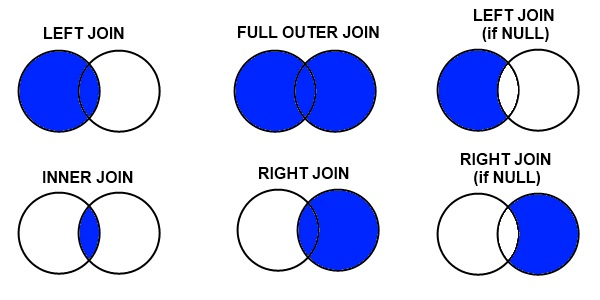

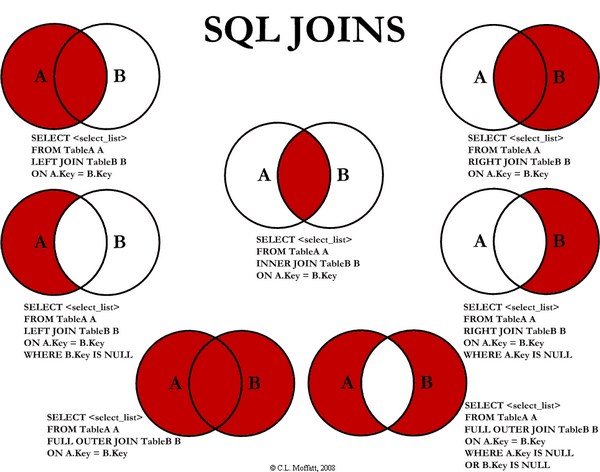